# Figures data Prades - D$^{14}$C



### Libraries

In [614]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import re
import seaborn as sns
from statannotations.Annotator import Annotator
from scipy import stats
from statistics import median

In [134]:
# Conversion Fm (Fraction Modern) to $\Delta$^14^C
def fm_D14C(fm,yr,lft=8267):
    dcy=fm*np.exp((1950-yr)/lft)
    D14C=(dcy-1)*1000
    return D14C

#Conversion $\Delta$^14^C to Fm (Fraction Modern)
def D14C_fm(D14C,yr,lft=8267):
    fm=(D14C/1000+1)*np.exp((yr-1950)/lft)
    return fm

# symbols for p_value
def p_value(pp):
    if pp>5e-2:pstar='ns'
    elif pp>1e-2:pstar='*'
    elif pp>1e-3:pstar='**'
    elif pp>1e-4:pstar='***'
    else: pstar='****'
        
    return pstar

In [135]:
pools=['ER','FFSR','Soil inc. 0-5','Soil inc. 5-10', 'Wood', 'Foliage','Fine litter','Coarse litter', 'Roots 0-5','Roots 5-10', 'Roots 10-15', 'Roots 15-20', 'Soil 0-5', 'Soil 5-10', 'Soil 10-15', 'Soil 15-20']
f14c=np.zeros([2,len(pools)])*np.nan # % of carbon. control, drought.
f14c_sd=np.zeros([2,len(pools)])*np.nan # standard deviation of % of carbon. control, drought.
test=np.zeros(len(pools))*np.nan

control=[5,7,9,10]
drought=[2,3,4,6]

### Reference values (atmospheric)

In [137]:
F14C_atmod=0.9975615225273415 # Modeled value.

bkg=pd.read_excel('Data/LabResults/Air_ecosystem_d14C.xlsx',header=31) # Measured in the field.
bkg=bkg[bkg['Plot']=='bkg']

F14C_atm=np.mean([bkg.F14C.mean(),F14C_at]) # mean
D14C_atm=fm_D14C(F14C_atm,2024)

## Soil respiration 

In [510]:
data=pd.read_excel('Data/LabResults/Air_soil_field_d14C.xlsx',header=30)
data['datetime'] = pd.to_datetime(data['Collection_date'].dt.strftime('%Y-%m-%d') + data['Collection_time'].astype(str), format = '%Y-%m-%d%H:%M:%S')
plot=np.empty(len(data),dtype=int); treatment=['']*len(data)
for i in range(len(data)):
    plot[i]=data['Probe'][i].split('_')[3]
    treatment[i]=data['Probe'][i].split('_')[4]
data['plot']=plot; data['treatment']=treatment

data.loc[data['treatment']=='control','treatment']='Control'
data.loc[data['treatment']=='drought','treatment']='Drought'

con=data[data['plot'].isin(control)] ; conf=con
dro=data[data['plot'].isin(drought)] ; drof=dro

b=data[data.columns[4]]-D14C_atm # substract D14C atmospheric
data['D']=b

dataf=data
FFSR=data

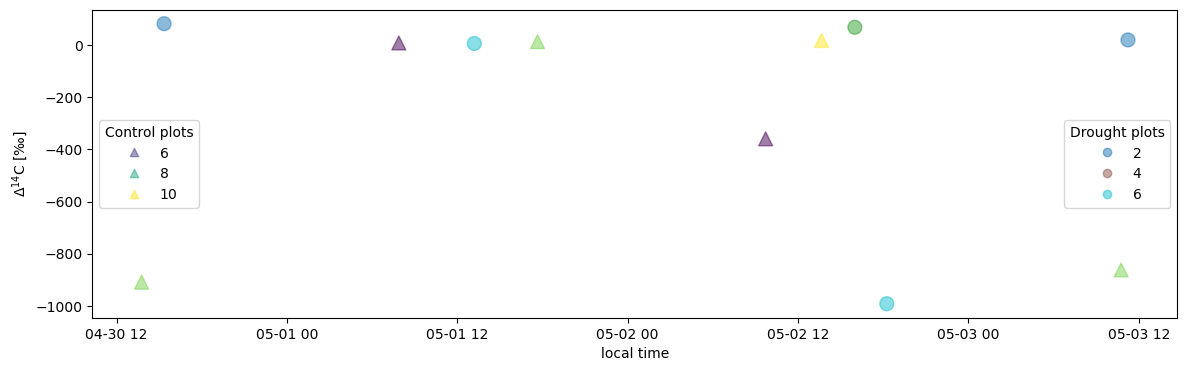

In [139]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
    
fig=plt.subplots(figsize=[14,4])
scatter1=plt.scatter(con.datetime,con[vv],c=con['plot'],marker='^',alpha=0.5,s=100)
legend1=plt.legend(*scatter1.legend_elements(num=3),title="Control plots",loc="center left")
plt.gca().add_artist(legend1)
scatter2=plt.scatter(dro.datetime,dro[vv],c=dro['plot'],cmap=plt.cm.tab10,marker='o',alpha=0.5,s=100)
plt.ylabel(tity); plt.xlabel('local time')
legend2=plt.legend(*scatter2.legend_elements(num=3),title='Drought plots')

#### Without very negative values

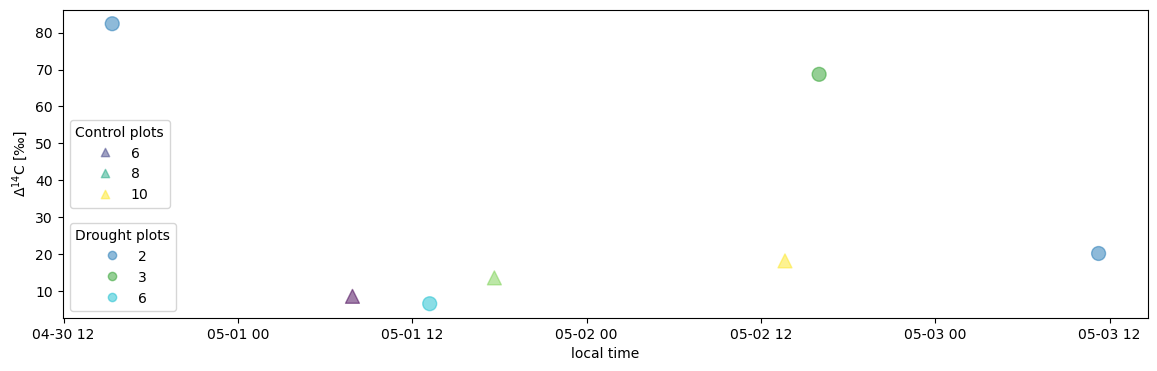

In [140]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
    
fig=plt.subplots(figsize=[14,4])
con=con[con[con.columns[4]]>-300]
scatter1=plt.scatter(con.datetime,con[vv],c=con['plot'],marker='^',alpha=0.5,s=100)
legend1=plt.legend(*scatter1.legend_elements(num=3),title="Control plots",loc="center left")
plt.gca().add_artist(legend1)
dro=dro[dro[dro.columns[4]]>-300]
scatter2=plt.scatter(dro.datetime,dro[vv],c=dro['plot'],cmap=plt.cm.tab10,marker='o',alpha=0.5,s=100)
plt.ylabel(tity); plt.xlabel('local time')
legend2=plt.legend(*scatter2.legend_elements(),title='Drought plots',loc="lower left")

/home/_ehoyos/anaconda3/envs/bgc_md2/lib/python3.9/site-packages/matplotlib/axes/_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


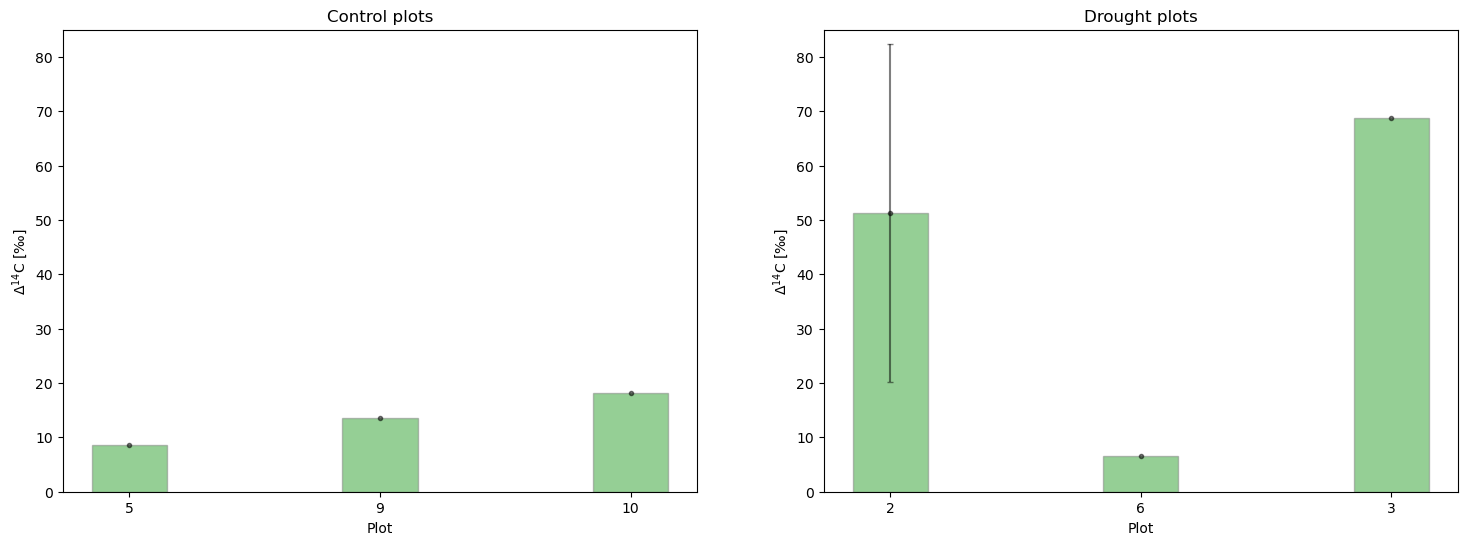

In [141]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'; x1=0; x2=1.2 
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'; x1=0; x2=85

con=data[data['plot'].isin(control)]
dro=data[data['plot'].isin(drought)]

## removing very negative values:
con=con[con[con.columns[4]]>-300]; dro=dro[dro[dro.columns[4]]>-300]

fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))

barWidth=0.30
br=np.arange(3)

res=np.zeros([2,3])*np.nan; std=np.zeros([2,3])*np.nan
control2=con['plot'].unique(); drought2=dro['plot'].unique()
for i in range(3):
    w=con[con['plot']==control2[i]]
    res[0,i]=w[vv].mean();std[0,i]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=dro[dro['plot']==drought2[i]]
    res[1,i]=w[vv].mean();std[1,i]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))

axs[0].bar(br,res[0,],width=barWidth,edgecolor='grey',label=control2[i],color=colors[i],alpha=0.5) 
axs[0].errorbar(br,res[0,],std[0,],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[1].bar(br,res[1,],width=barWidth,edgecolor='grey',label=drought[i],color=colors[i],alpha=0.5) 
axs[1].errorbar(br,res[1,],std[1,],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0].set_title('Control plots');axs[1].set_title('Drought plots')
axs[0].set_ylim(x1,x2);axs[1].set_ylim(x1,x2)
axs[0].set_xlabel('Plot');axs[1].set_xlabel('Plot')
axs[0].set_ylabel(tity);axs[1].set_xlabel('Plot'); axs[1].set_ylabel(tity);axs[1].set_xlabel('Plot')
axs[0].set_xticks([r for r in range(len(control2))],control2)
axs[1].set_xticks([r for r in range(len(drought2))],drought2)


(0.0, 0.6)

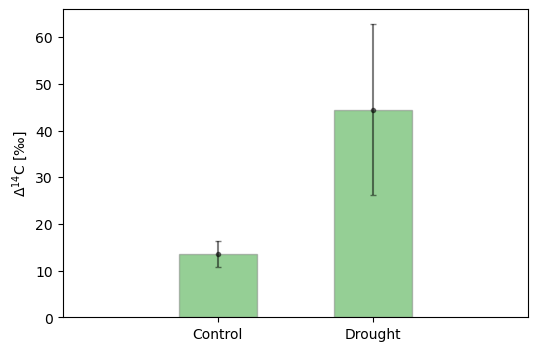

In [142]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
    
con=data[data['plot'].isin(control)]
dro=data[data['plot'].isin(drought)]

## removing very negative values:
con=con[con[con.columns[4]]>-300]; dro=dro[dro[dro.columns[4]]>-300]

fig=plt.subplots(figsize=(6,4)) 
barWidth=0.1
br=[0.2,0.4]

res=np.zeros(2)*np.nan; std=np.zeros(2)*np.nan
w=con[con[vv].notnull()];res[0]=w[vv].mean(); std[0]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
w=dro[dro[vv].notnull()];res[1]=w[vv].mean(); std[1]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))

f14c[:,1]=res; f14c_sd[:,1]=std

plt.bar(br,res,width=barWidth,edgecolor='grey',label=control2[i],color=colors[i],alpha=0.5) 
plt.errorbar(br,res,std,fmt='.',color='Black',alpha=0.5,capsize=2)
plt.ylabel(tity)
plt.xticks([r for r in br],['Control','Drought'])
plt.xlim(0,0.6)

##### Statistical test

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Drought vs. Control: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.888e-01 Stat=1.125e+00


/tmp/ipykernel_9160/957994232.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axs, **hue_plot_params)
/tmp/ipykernel_9160/957994232.py:20: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(ax=axs, **hue_plot_params)


Text(0.5, 14.722222222222216, 'Treatment')

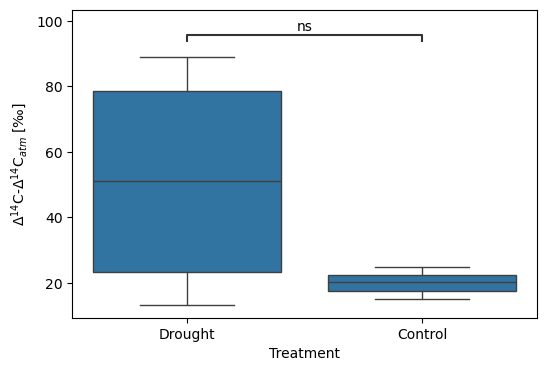

In [143]:
v='A'# F: F14C, D: D14C., A: D14C-D14C_atm
if v=='F':vv=data.columns[2];tity='F$^{14}$C [-]'
if v=='D':vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
if v=='A':vv=data.D; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'
## Remove very negative values
#df=data
df=data[data[data.columns[4]]>-300]

fig,axs=plt.subplots(figsize=[6,4])
pairs=[[('Control'), ('Drought')]]

states_palette = sns.color_palette("tab10", n_colors=1)
hue_plot_params = {
    'data':df,
    'x': "treatment",
    'y': vv,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel(tity); axs.set_xlabel('Treatment')



##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel

In [144]:
# save results of statistical test.
_, results = annotator.apply_and_annotate()
stat_results=[result.data.pvalue for result in results]
w=np.array(stat_results)

test[1]=w

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Drought vs. Control: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.888e-01 Stat=1.125e+00


<Figure size 640x480 with 0 Axes>

### F$^{14}$C or $\Delta^{14}$C from incubations

In [511]:
data=pd.read_excel('Data/LabResults/Air_soil_incub_d14C.xlsx',header=30)

temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(data),dtype=int); depth=['']*len(data); treat=['']*len(data)
for i in range(len(data)):
    b=data['Probe'][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    depth[i]=(data['Probe'][i].split('_')[-1]).split(' ')[0]
    if plot[i] in control: treat[i]='Control'
    if plot[i] in drought: treat[i]='Drought'
    
data['plot']=plot; data['depth']=depth; data['treatment']=treat 
depths=data.depth.unique()

con=data[data['plot'].isin(control)] 
dro=data[data['plot'].isin(drought)] 

b=data[data.columns[4]]-D14C_atm # substract D14C atmospheric
data['D']=b

datai=data
Soil_inc=data

([<matplotlib.axis.XTick at 0x7f14f7d54d30>,
 [Text(0.125, 0, '0-5'), Text(1.125, 0, '5-10')])

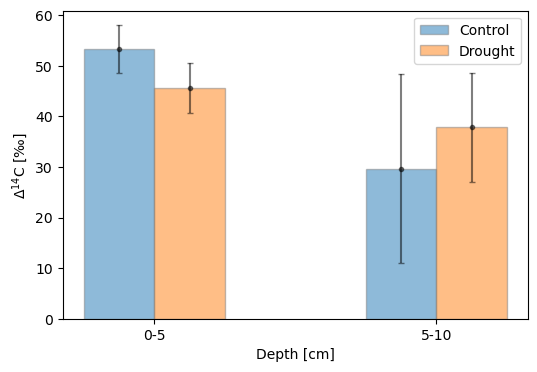

In [159]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
   
fig=plt.subplots(figsize=(6,4)) 
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.25 
br1=np.arange(2) 
br2=[x+barWidth for x in br1]

res=np.empty(len(depths));std=np.empty(len(depths))
for i in range(len(depths)):
    res[i]=con[vv][con.depth==depths[i]].mean()
    a=con[vv][con.depth==depths[i]]
    std[i]=a.std()/np.sqrt(len(a[~a.isna()]))
plt.bar(br1,res,width=barWidth,edgecolor='grey',label ='Control',alpha=0.5) 
plt.errorbar(br1,res,std,fmt='.',color='Black',alpha=0.5,capsize=2)
f14c[0,2:4]=res; f14c_sd[0,2:4]=std

res=np.empty(len(depths));std=np.empty(len(depths))
for i in range(len(depths)):
    res[i]=dro[vv][dro.depth==depths[i]].mean()
    a=dro[vv][dro.depth==depths[i]]
    std[i]=a.std()/np.sqrt(len(a[~a.isna()]))
plt.bar(br2,res,width=barWidth,edgecolor='grey',label='Drought',alpha=0.5) 
plt.errorbar(br2,res,std,fmt='.',color='Black',alpha=0.5,capsize=2)
f14c[1,2:4]=res; f14c_sd[1,2:4]=std

plt.legend()
plt.ylabel(tity);plt.xlabel('Depth [cm]')
plt.xticks([r+barWidth/2 for r in range(len(depths))],depths)

##### Statistical test

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.000e+00 Stat=0.000e+00
0-5_Control vs. 0-5_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.482e-01 Stat=1.333e+00


Text(0.5, 14.722222222222216, 'Depth [cm]')

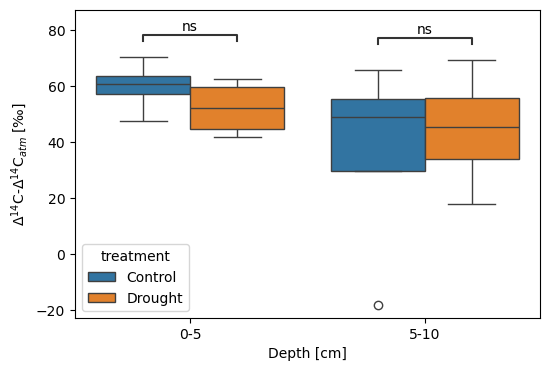

In [162]:
v='A'# F: F14C, D: D14C., A:D14C-D14C_atm

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
if v=='A':vv=data.D; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'

fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('0-5', 'Control'), ('0-5', 'Drought')],
    [('5-10', 'Control'), ('5-10', 'Drought')],
]

states_palette = sns.color_palette("tab10", n_colors=2)
states_order = treat
subcat_order = depths
hue_plot_params = {
    'data': data,
    'x': "depth",
    'y': vv,
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel(tity);axs.set_xlabel('Depth [cm]')
##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel

In [167]:
# save results of statistical test.
_, results = annotator.apply_and_annotate()
stat_results=[result.data.pvalue for result in results]
w=np.array(stat_results)

temp=w[0]
w[0]=w[1]
w[1]=temp

test[2:4]=w

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.000e+00 Stat=0.000e+00
0-5_Control vs. 0-5_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.482e-01 Stat=1.333e+00


<Figure size 640x480 with 0 Axes>

### Comparison $\Delta^{14}$C incubations and field respiration

/home/_ehoyos/anaconda3/envs/bgc_md2/lib/python3.9/site-packages/matplotlib/axes/_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


Text(0.5, 1.0, 'Drought')

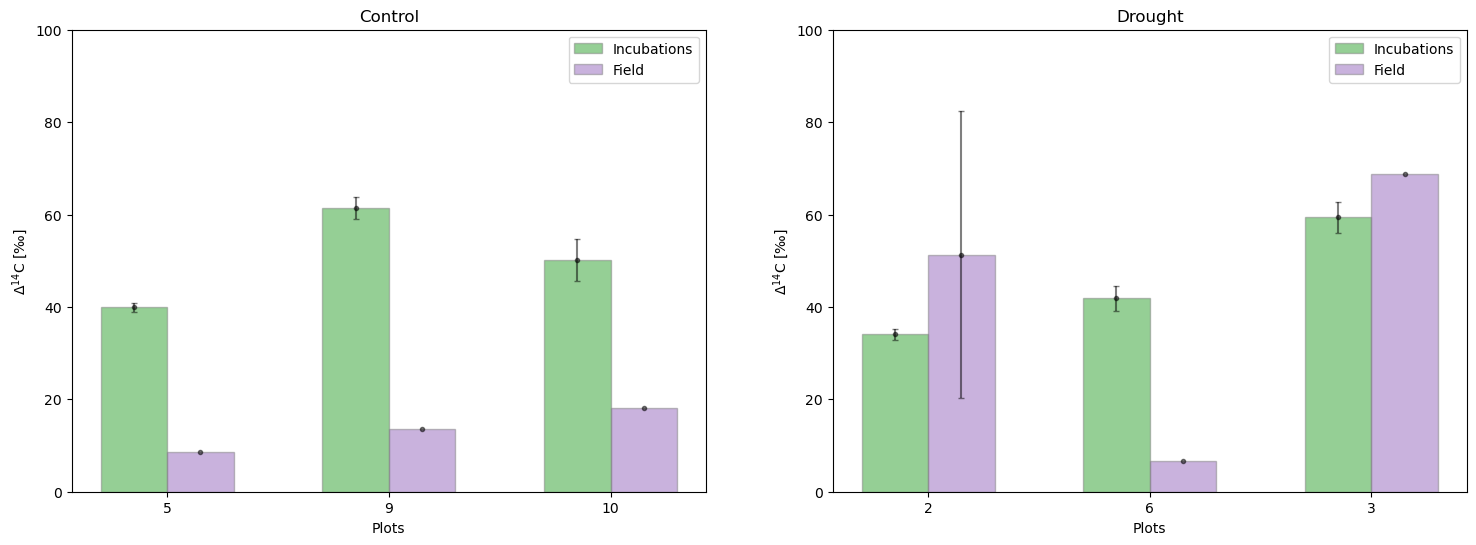

In [169]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'; x1=0.95; x2=1.12
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'; x1=0; x2=100 

## removing very negative values from field values:
conf=conf[conf[conf.columns[4]]>-300]; drof=drof[drof[drof.columns[4]]>-300]

comp=['Incubations','Field']
control2=conf['plot'].unique();drought2=drof['plot'].unique()
res1=np.empty([3,2]);std1=np.empty([3,2]) # control
res2=np.empty([3,2]);std2=np.empty([3,2]) # drought
for i in range(3):
    w=con[con['plot']==control2[i]];res1[i,0]=w[vv].mean();std1[i,0]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=conf[conf['plot']==control2[i]];res1[i,1]=w[vv].mean();std1[i,1]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    
    w=dro[dro['plot']==drought2[i]];res2[i,0]=w[vv].mean();std2[i,0]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=drof[drof['plot']==drought2[i]];res2[i,1]=w[vv].mean();std2[i,1]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    
fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
treat=['Control','Drought']

barWidth=0.3
br1=np.arange(3)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

for i in range(2):
    axs[0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=comp[i],color=colors[i+2],alpha=0.5) 
    axs[0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=comp[i],color=colors[i+2],alpha=0.5) 
    axs[1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[i].set_ylabel(tity); axs[i].set_xlabel('Plots')
    
    axs[i].set_ylim(x1,x2)

axs[0].legend(); axs[1].legend()
axs[0].set_xticks([r+barWidth/2 for r in range(len(control2))],control2)
axs[1].set_xticks([r+barWidth/2 for r in range(len(drought2))],drought2)
axs[0].set_title('Control');axs[1].set_title('Drought')


##### Statistic test

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Drought_Incubations vs. Drought_Field: Kruskal-Wallis independent samples (pairwise between groups), P_val:8.651e-01 Stat=2.885e-02
Control_Incubations vs. Control_Field: Kruskal-Wallis independent samples (pairwise between groups), P_val:6.619e-02 Stat=3.375e+00


Text(0.5, 14.722222222222216, 'Treatment [cm]')

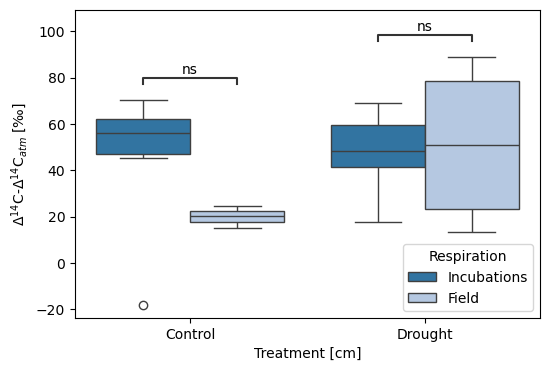

In [171]:
v='A'# F: F14C, D: D14C., A: D14C-D14atm

dataf=dataf[dataf[dataf.columns[4]]>-300] # remove very negative values.
a=['Incubations']*len(datai);b=['Field']*len(dataf)
datai['Respiration']=a; dataf['Respiration']=b
dataif=pd.concat([datai,dataf])

if v=='F': vv=dataif.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=dataif.columns[4];tity='$\Delta^{14}$C [‰]'
if v=='A': vv=dataif.D; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'

fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('Control', 'Incubations'), ('Control', 'Field')],
    [('Drought', 'Incubations'), ('Drought', 'Field')],
]

states_palette = sns.color_palette("tab20", n_colors=2)
states_order = ['Incubations','Field']
subcat_order = treat
hue_plot_params = {
    'data': dataif,
    'x': "treatment",
    'y': vv,
    "order": subcat_order,
    "hue": "Respiration",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Brunner-Munzel').apply_and_annotate()
axs.set_ylabel(tity);axs.set_xlabel('Treatment [cm]')
##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel

## Solids

### Soils

In [512]:
data=pd.read_excel('Data/LabResults/Solids_soil_d14C.xlsx',header=30)

temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(data),dtype=int); depth=['']*len(data); treat=['']*len(data)
for i in range(len(data)):
    b=data['Probe'][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    depth[i]=(data['Probe'][i].split('_')[-1]).split(' ')[-1]
    if plot[i] in control: treat[i]='Control'
    if plot[i] in drought: treat[i]='Drought'
    
data['plot']=plot; data['depth']=depth; data['treatment']=treat 
depths=data.depth.unique()
w=depths[1]; depths[1]=depths[2]; depths[2]=w
b=data[data.columns[4]]-D14C_atm # substract D14C atmospheric
data['D']=b
con=data[data['plot'].isin(control)] 
dro=data[data['plot'].isin(drought)] 

Soil_solid=data


/home/_ehoyos/anaconda3/envs/bgc_md2/lib/python3.9/site-packages/matplotlib/axes/_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


Text(0.5, 1.0, 'Drought')

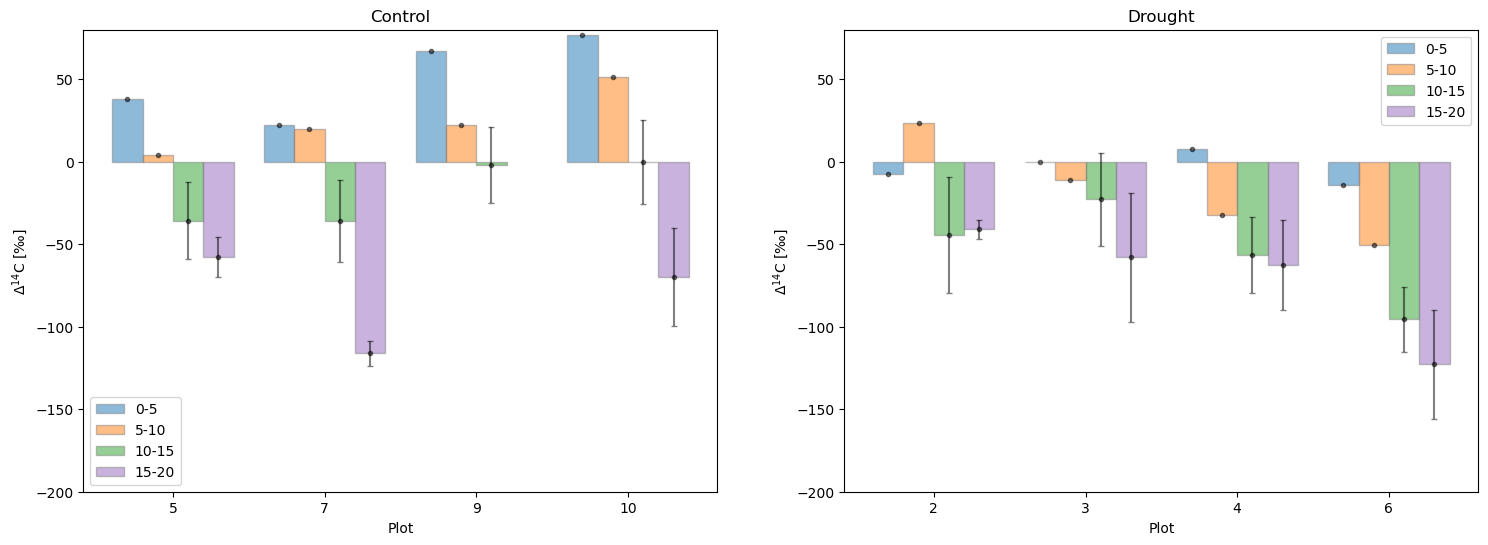

In [292]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'; x1=0.8; x2=1.10
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'; x1=-200; x2=80 

fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))

barWidth=0.20
br1=np.arange(len(depths))
br2=[x+barWidth for x in br1] 
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br=[br1,br2,br3,br4]

res1=np.zeros([4,len(depths)])*np.nan; std1=np.zeros([4,len(depths)])*np.nan
res2=np.zeros([4,len(depths)])*np.nan; std2=np.zeros([4,len(depths)])*np.nan
for i in range(4):
    for j in range(len(depths)):
        w=con[(con['plot']==control[i])&(con['depth']==depths[j])]
        res1[i,j]=w[vv].mean();std1[i,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
        w=dro[(dro['plot']==drought[i])&(dro['depth']==depths[j])]
        res2[i,j]=w[vv].mean();std2[i,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))

for i in range(len(depths)):
    axs[0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)

for i in range(2):
    axs[i].legend(); axs[i].set_ylabel(tity); axs[i].set_xlabel('Plot');axs[i].set_ylim(x1,x2)
    if v=='F':axs[i].axhline(1,color='gray',linestyle='--'); axs[1].axhline(1,color='gray',linestyle='--') 
axs[0].set_xticks([r+barWidth*1.5 for r in range(len(control))],control)
axs[1].set_xticks([r+barWidth*1.5 for r in range(len(drought))],drought)
axs[0].set_title('Control'); axs[1].set_title('Drought')

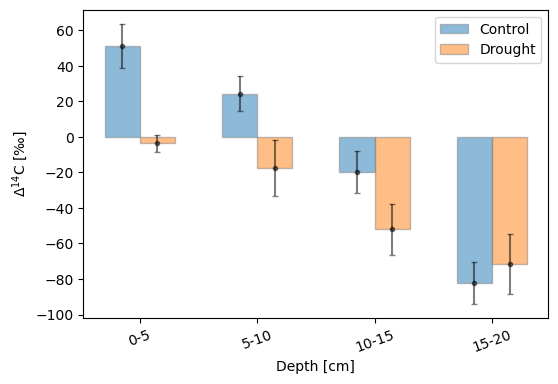

In [293]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'

fig,axs=plt.subplots(figsize=[6,4])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
treat=['Control','Drought']

barWidth=0.3
br=np.arange(4)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

res=np.zeros([2,len(depths)])*np.nan; std=np.zeros([2,len(depths)])*np.nan
for j in range(len(depths)):
    w=con[con['depth']==depths[j]]
    res[0,j]=w[vv].mean();std[0,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=dro[dro['depth']==depths[j]]
    res[1,j]=w[vv].mean();std[1,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
f14c[:,12:16]=res; f14c_sd[:,12:16]=std
for i in range(2):
    plt.bar(br[i],res[i,:],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    plt.errorbar(br[i],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
plt.legend()
plt.xticks([r+barWidth/2 for r in range(len(depths))],depths,rotation=20)
plt.ylabel(tity);plt.xlabel('Depth [cm]')
if v=='F':plt.axhline(1,color='gray',linestyle='--')

##### statistic test

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10-15_Control vs. 10-15_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.793e-02 Stat=3.108e+00
0-5_Control vs. 0-5_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.092e-02 Stat=5.333e+00
5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.489e-01 Stat=2.083e+00
15-20_Control vs. 15-20_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.820e-01 Stat=3.029e-01


Text(0.5, 14.722222222222216, 'Depth [cm]')

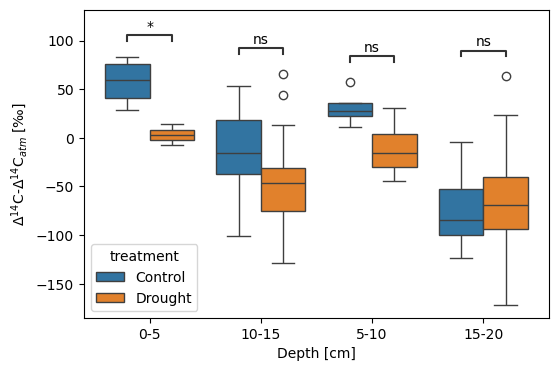

In [294]:
v='A'# F: F14C, D: D14C. A: D14C-D14Catm

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
if v=='A': vv=data.D; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'

fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('0-5', 'Control'), ('0-5', 'Drought')],
    [('5-10', 'Control'), ('5-10', 'Drought')],
    [('10-15', 'Control'), ('10-15', 'Drought')],
    [('15-20', 'Control'), ('15-20', 'Drought')],
]

depths=data.depth.unique()
states_palette=sns.color_palette("tab10", n_colors=2)
states_order=treat
subcat_order=depths
hue_plot_params = {
    'data':data,
    'x': "depth",
    'y': vv,
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel(tity);axs.set_xlabel('Depth [cm]')
##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel

In [295]:
# save results of statistical test.
_, results = annotator.apply_and_annotate()
stat_results=[result.data.pvalue for result in results]
w=np.array(stat_results)

temp=w[0];temp2=w[2]
w[0]=w[1]
w[1]=w[2]
w[2]=temp

test[12:16]=w

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10-15_Control vs. 10-15_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.793e-02 Stat=3.108e+00
0-5_Control vs. 0-5_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.092e-02 Stat=5.333e+00
5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.489e-01 Stat=2.083e+00
15-20_Control vs. 15-20_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.820e-01 Stat=3.029e-01


<Figure size 640x480 with 0 Axes>

### Roots

In [855]:
data=pd.read_excel('Data/LabResults/Solids_veg_roots_d14C.xlsx',header=30)

temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(data),dtype=int); depth=['']*len(data); treat=['']*len(data)
for i in range(len(data)):
    b=data['Probe'][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    depth[i]=(data['Probe'][i].split('_')[-1]).split(' ')[1]
    if plot[i] in control: treat[i]='Control'
    if plot[i] in drought: treat[i]='Drought'
    
data['plot']=plot; data['depth']=depth; data['treatment']=treat 
depths=data.depth.unique()
w=depths[1]; depths[1]=depths[-1]; depths[3]=depths[2]; depths[2]=w
b=data[data.columns[4]]-D14C_atm # substract D14C atmospheric
data['D']=b
con=data[data['plot'].isin(control)] 
dro=data[data['plot'].isin(drought)] 

Roots=data

Text(0.5, 1.0, 'Drought')

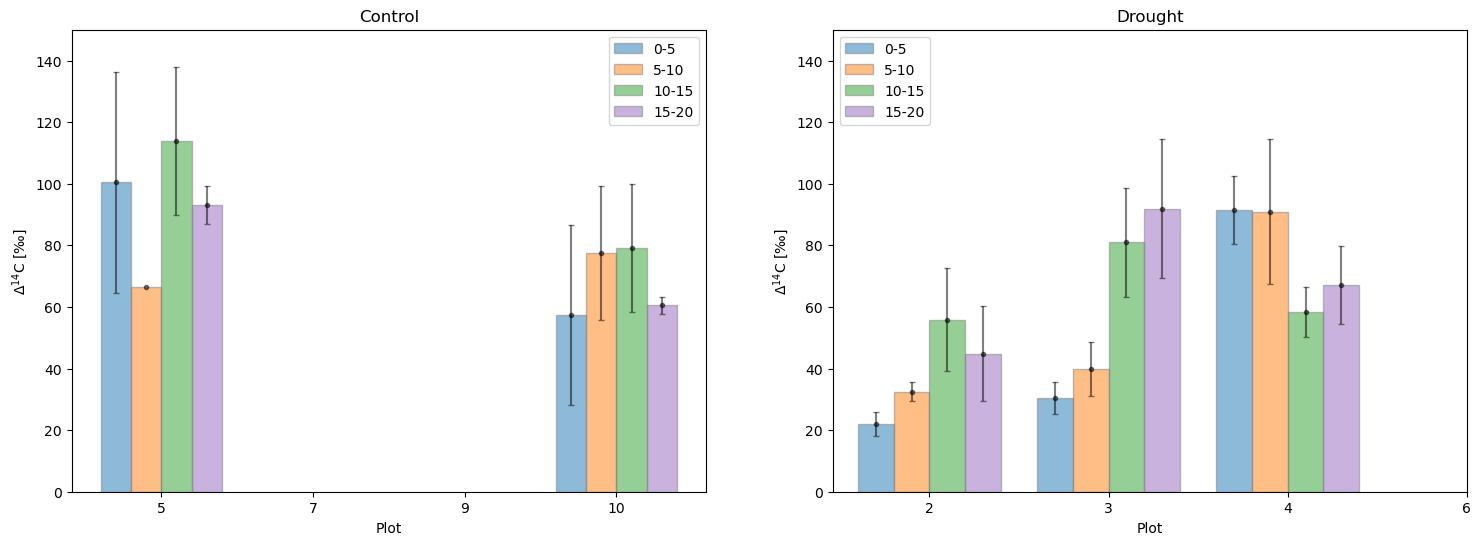

In [297]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'; x1=1; x2=1.15
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'; x1=0; x2=150 

fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))

barWidth=0.20
br1=np.arange(len(depths))
br2=[x+barWidth for x in br1] 
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br=[br1,br2,br3,br4]

res1=np.zeros([4,len(depths)])*np.nan; std1=np.zeros([4,len(depths)])*np.nan
res2=np.zeros([4,len(depths)])*np.nan; std2=np.zeros([4,len(depths)])*np.nan
for i in range(4):
    for j in range(len(depths)):
        w=con[(con['plot']==control[i])&(con['depth']==depths[j])]
        res1[i,j]=w[vv].mean();std1[i,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
        w=dro[(dro['plot']==drought[i])&(dro['depth']==depths[j])]
        res2[i,j]=w[vv].mean();std2[i,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))

for i in range(len(depths)):
    axs[0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)

for i in range(2):
    axs[i].legend(); axs[i].set_ylabel(tity); axs[i].set_xlabel('Plot');axs[i].set_ylim(x1,x2)
    if v=='F':axs[i].axhline(1,color='gray',linestyle='--'); axs[1].axhline(1,color='gray',linestyle='--') 
axs[0].set_xticks([r+barWidth*1.5 for r in range(len(control))],control)
axs[1].set_xticks([r+barWidth*1.5 for r in range(len(drought))],drought)
axs[0].set_title('Control'); axs[1].set_title('Drought')

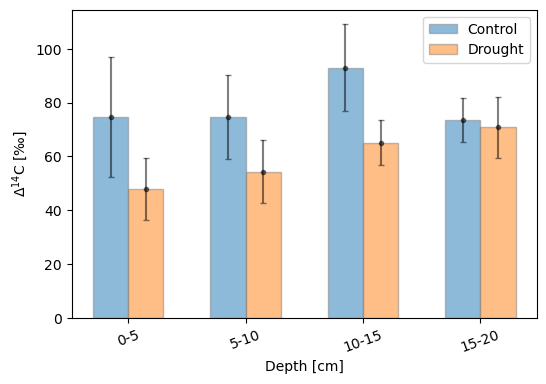

In [298]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'

fig,axs=plt.subplots(figsize=[6,4])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
treat=['Control','Drought']

barWidth=0.3
br=np.arange(4)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

res=np.zeros([2,len(depths)])*np.nan; std=np.zeros([2,len(depths)])*np.nan
for j in range(len(depths)):
    w=con[con['depth']==depths[j]]
    res[0,j]=w[vv].mean();std[0,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=dro[dro['depth']==depths[j]]
    res[1,j]=w[vv].mean();std[1,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
f14c[:,8:12]=res; f14c_sd[:,8:12]=std
for i in range(2):
    plt.bar(br[i],res[i,:],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    plt.errorbar(br[i],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
plt.legend()
plt.xticks([r+barWidth/2 for r in range(len(depths))],depths,rotation=20)
plt.ylabel(tity);plt.xlabel('Depth [cm]')
if v=='F':plt.axhline(1,color='gray',linestyle='--')

##### statistic test

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10-15_Control vs. 10-15_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.252e-01 Stat=2.351e+00
0-5_Control vs. 0-5_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.173e-01 Stat=1.000e+00
15-20_Control vs. 15-20_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.697e-01 Stat=8.571e-02
5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.649e-01 Stat=1.929e+00


Text(0.5, 14.722222222222216, 'Depth [cm]')

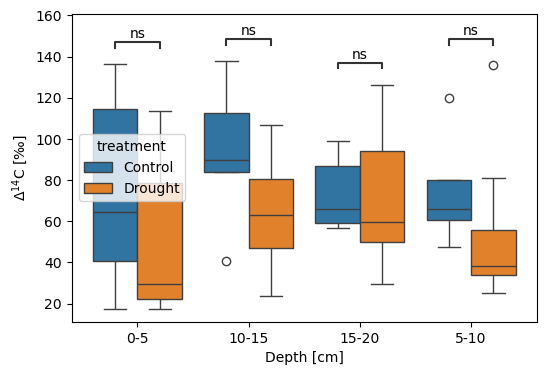

In [299]:
v='D'# F: F14C, D: D14C. A: D14C-D14Catm

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
if v=='A': vv=data.D; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'

fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('0-5', 'Control'), ('0-5', 'Drought')],
    [('5-10', 'Control'), ('5-10', 'Drought')],
    [('10-15', 'Control'), ('10-15', 'Drought')],
    [('15-20', 'Control'), ('15-20', 'Drought')],
]

depths=data.depth.unique()
states_palette=sns.color_palette("tab10", n_colors=2)
states_order=treat
subcat_order=depths
hue_plot_params = {
    'data':data,
    'x': "depth",
    'y': vv,
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel(tity);axs.set_xlabel('Depth [cm]')
##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel

In [304]:
# save results of statistical test.
_, results = annotator.apply_and_annotate()
stat_results=[result.data.pvalue for result in results]
w=np.array(stat_results)

temp=w[0];temp2=w[2]
w[0]=w[1]
w[1]=w[3]
w[2]=temp
w[3]=temp2

test[8:12]=w

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10-15_Control vs. 10-15_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.252e-01 Stat=2.351e+00
0-5_Control vs. 0-5_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.173e-01 Stat=1.000e+00
15-20_Control vs. 15-20_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.697e-01 Stat=8.571e-02
5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.649e-01 Stat=1.929e+00


<Figure size 640x480 with 0 Axes>

### Wood, Foliage, Litter

In [514]:
data=pd.read_excel('Data/LabResults/Solids_veg_d14C.xlsx',header=31)
temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(data),dtype=int); pool=['']*len(data); treat=['']*len(data)

for i in range(len(data)):
    b=data['Probe'][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    pool[i]=(data['Probe'][i].split('_')[2])
    if plot[i] in control: treat[i]='Control'
    if plot[i] in drought: treat[i]='Drought'
    
data['plot']=plot; data['pool']=pool; data['treatment']=treat 
poolsv=data.pool.unique(); poolsvnam=['Wood','Foliage','Fine litter','Coarse litter']
w=poolsv[0]; poolsv[0]=poolsv[3]; poolsv[3]=w; w=poolsv[1]; poolsv[1]=poolsv[2]; poolsv[2]=w
b=data[data.columns[4]]-D14C_atm # substract D14C atmospheric
data['D']=b

Veget=data

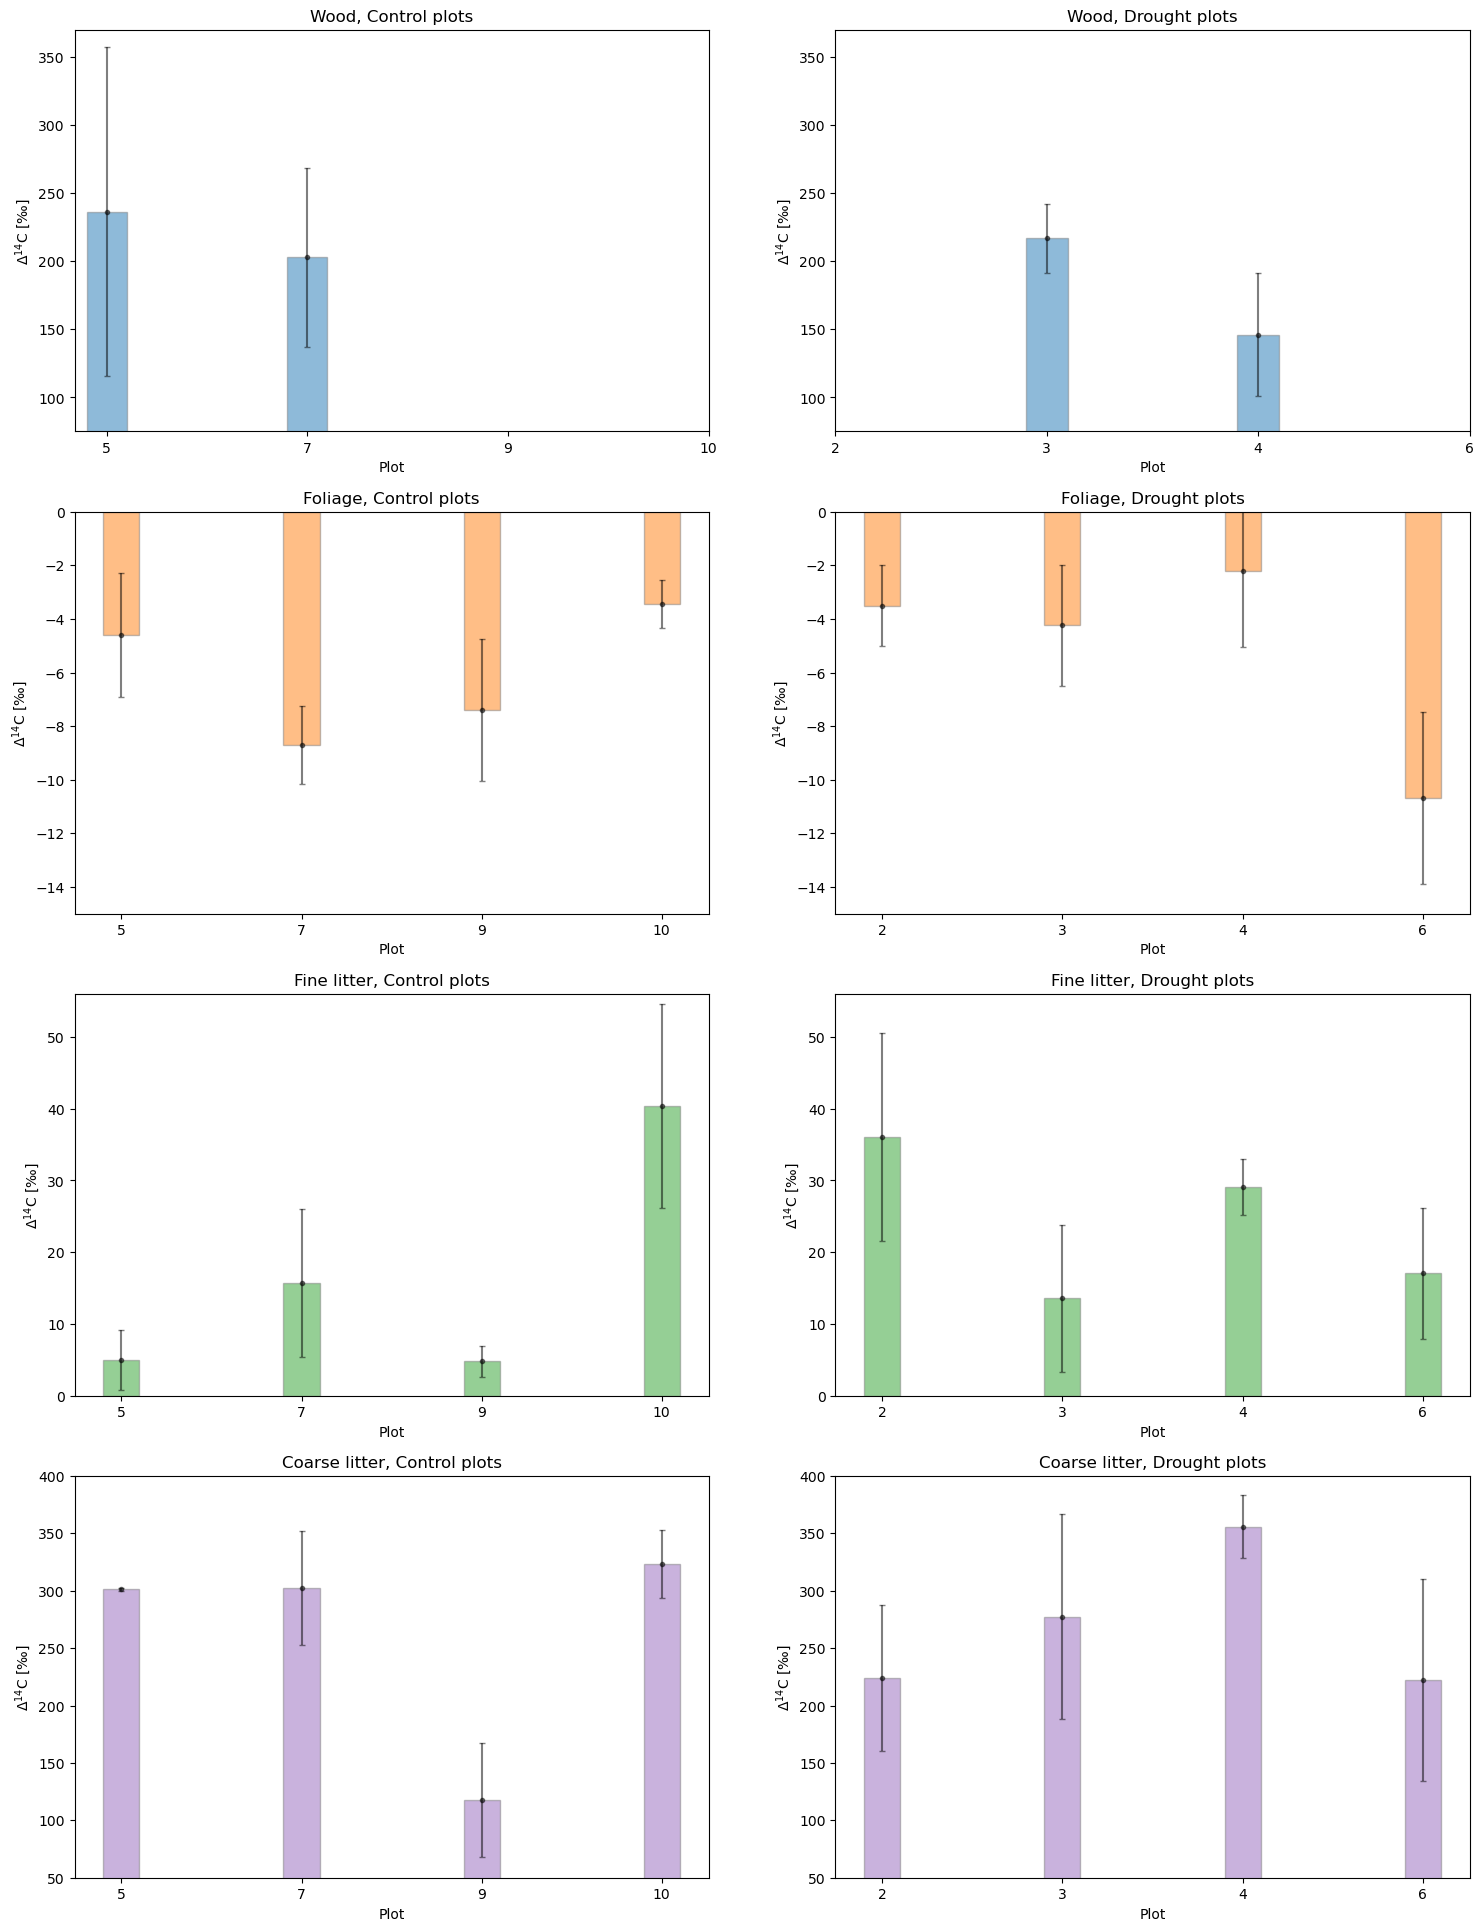

In [453]:
v='D'
if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'; x1=[1.1,0.99,1,1]; x2=[1.4,1.01,1.07,1.4]
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]';x1=[75,-15,0,50]; x2=[370,0,56,400]

fig,axs=plt.subplots(4,2,figsize=[18,24])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.20
treat=['Control','Drought']
br=np.arange(4)

for i in range(len(poolsv)): # pools
    v1=data[data['pool']==poolsv[i]]
    res=np.zeros([4,2])*np.nan; std=np.zeros([4,2])*np.nan
    for j in range(2): # treatment
        v2=v1[v1['treatment']==treat[j]]
        if j==0: plots=control
        if j==1: plots=drought
        for k in range(len(plots)):
            v3=v2[v2['plot']==plots[k]]
            res[k,j]=v3[vv].mean();std[k,j]=v3[vv].std()/np.sqrt(len(v3[vv][~v3[vv].isna()]))
        

        axs[i,j].bar(br,res[:,j],width=barWidth,edgecolor='grey',color=colors[i],alpha=0.5)   
        axs[i,j].errorbar(br,res[:,j],std[:,j],fmt='.',color='Black',alpha=0.5,capsize=2)
        axs[i,j].set_ylabel(tity); axs[i,j].set_xlabel('Plot'); axs[i,j].set_ylim(x1[i],x2[i])
        axs[i,j].set_title(poolsvnam[i]+', '+ treat[j]+' plots')

    axs[i,0].set_xticks([r for r in range(len(control))],control)
    axs[i,1].set_xticks([r for r in range(len(drought))],drought)

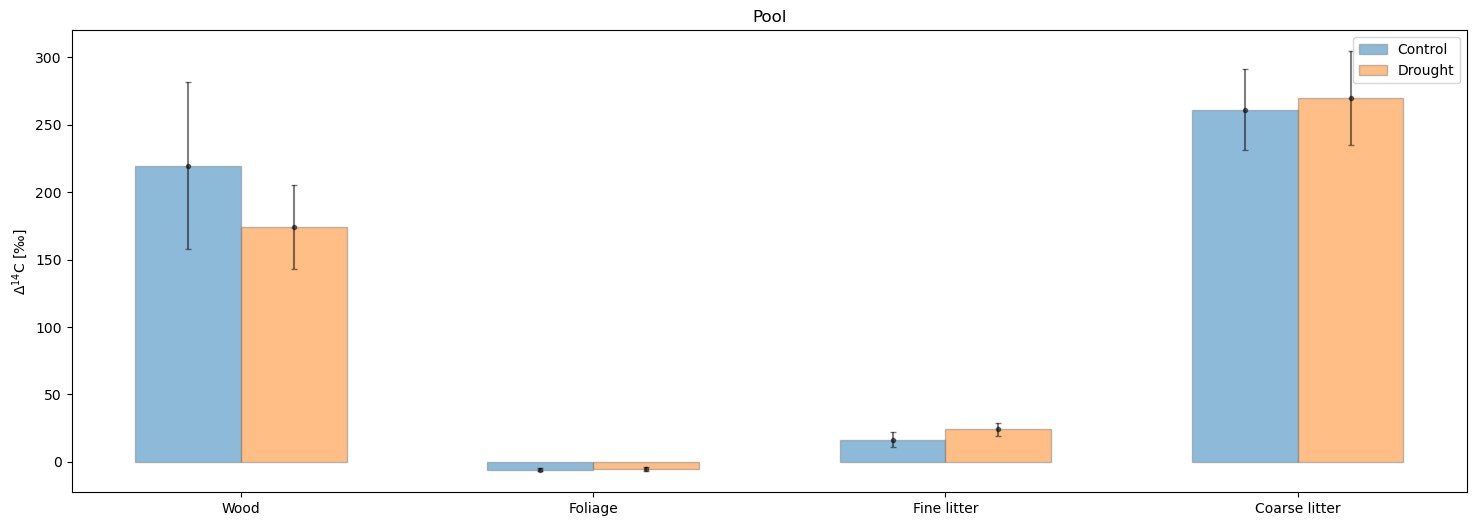

In [468]:
v='D'
if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'

fig,axs=plt.subplots(1,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.20
barWidth=0.3
br1=np.arange(4)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

res=np.zeros([4,2])*np.nan; std=np.zeros([4,2])*np.nan
for i in range(len(poolsv)): # pools
    v1=data[data['pool']==poolsv[i]]
    for j in range(2): # treatment
        v2=v1[v1['treatment']==treat[j]]
        res[i,j]=v2[vv].mean();std[i,j]=v2[vv].std()/np.sqrt(len(v2[vv][~v2[vv].isna()]))
    
for j in range(2):
    axs.bar(br[j],res[:,j],width=barWidth,edgecolor='grey',label=treat[j],color=colors[j],alpha=0.5) 
    axs.errorbar(br[j],res[:,j],std[:,j],fmt='.',color='Black',alpha=0.5,capsize=2)
           
axs.legend()
axs.set_xticks([r+barWidth/2 for r in range(4)],poolsvnam)
axs.set_ylabel(tity)
axs.set_title('Pool')
f14c[:,4:8]=res.T; f14c_sd[:,4:8]=std.T


##### statistical test

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FO_Control vs. FO_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.524e-01 Stat=5.646e-01
W_Control vs. W_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:8.551e-01 Stat=3.333e-02
FL_Control vs. FL_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.407e-01 Stat=9.079e-01
CL_Control vs. CL_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.290e-01 Stat=1.200e-01


Text(0.5, 36.72222222222221, 'Pool')

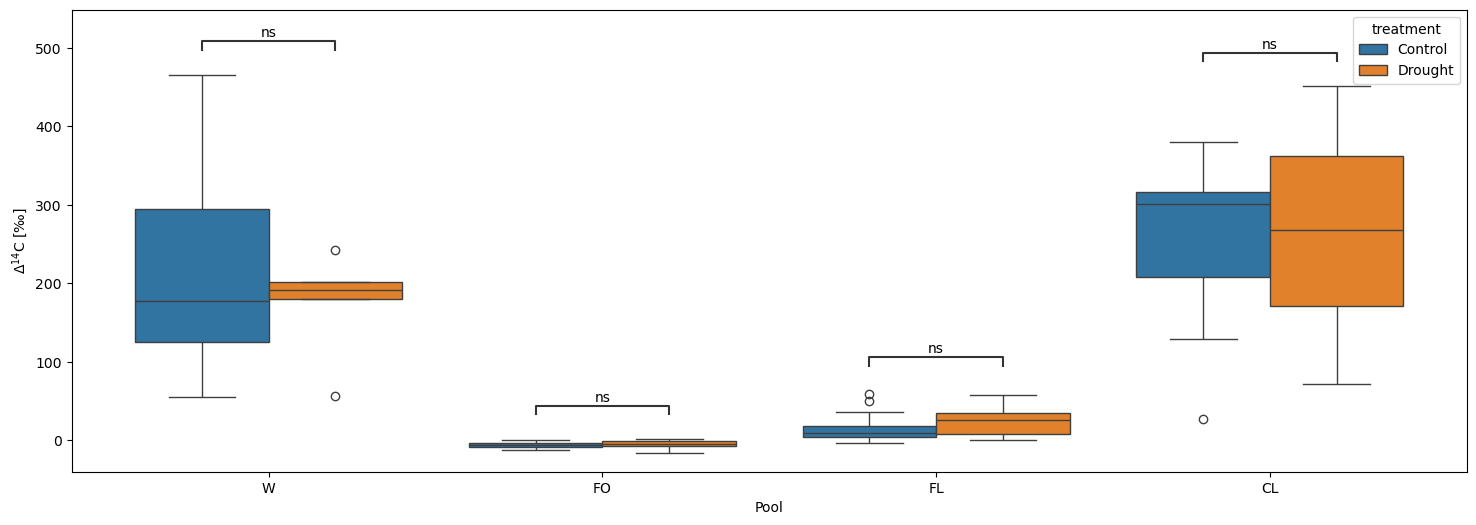

In [492]:
v='D'
if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'; x1=[1.1,0.99,1,1]; x2=[1.4,1.01,1.07,1.4]
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]';x1=[75,-15,0,50]; x2=[370,0,56,400]

fig,axs=plt.subplots(1,figsize=[18,6])
treat=['Control','Drought']

pairs = [
    [('W', 'Control'), ('W', 'Drought')],
    [('FO', 'Control'), ('FO', 'Drought')],
    [('FL', 'Control'), ('FL', 'Drought')],
    [('CL', 'Control'), ('CL', 'Drought')]
]

states_palette=sns.color_palette("tab10", n_colors=2)
states_order=treat
subcat_order=['W','FO','FL','CL']
hue_plot_params = {
    'data': data,
    'x': "pool",
    'y': vv,
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs,**hue_plot_params)
annotator=Annotator(axs,pairs,**hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel(tity);axs.set_xlabel('Pool')

##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel

In [499]:
# save results of statistical test.
_, results = annotator.apply_and_annotate()
stat_results=[result.data.pvalue for result in results]
w=np.array(stat_results)
temp=w[0]
w[0]=w[1]
w[1]=temp
test[4:8]=w

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FO_Control vs. FO_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.524e-01 Stat=5.646e-01
W_Control vs. W_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:8.551e-01 Stat=3.333e-02
FL_Control vs. FL_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.407e-01 Stat=9.079e-01
CL_Control vs. CL_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.290e-01 Stat=1.200e-01


<Figure size 640x480 with 0 Axes>

### Resume $^{14}$C

In [971]:
ER=pd.read_csv('Data/F14C_slopes_ER.csv') # read values generated in Miller_Tans_Prades.ipynb.

#merge all data in the same dataframe to facilitate plotting

# Vegetation pools.
Veget1=Veget[Veget.columns[[2,4,8,9,10]]] 
Veget1=Veget1.sort_values('pool', ascending=False)
# Field soil respiration.
a=['FFSR']*(len(FFSR))
FFSR['pool']=a
FFSR1=FFSR[FFSR.columns[[2,4,18,16,17]]]
FFSR1=FFSR1[FFSR1[FFSR1.columns[1]]>-300] 
# Incubated soil respiration.
a=['Soil inc.']*(len(Soil_inc))
Soil_inc['pool']=a
Soil_inc1=Soil_inc[Soil_inc.columns[[2,4,11,9,10,8]]] 
# Solid soils.
a=['Soil']*(len(Soil_solid))
Soil_solid['pool']=a
Soil_solid1=Soil_solid[Soil_solid.columns[[2,4,11,9,10,8]]] 
Soil_solid1['depth']=pd.Categorical(Soil_solid1['depth'], ["0-5", "5-10", "10-15", "15-20"])
Soil_solid1=Soil_solid1.sort_values("depth")
# Roots
a=['Roots']*(len(Roots))
Roots['pool']=a
Roots1=Roots[Roots.columns[[2,4,11,9,10,8]]] 
Roots1['depth']=pd.Categorical(Roots1['depth'], ["0-5", "5-10", "10-15", "15-20"])
Roots1=Roots1.sort_values("depth")
# Ecosystem respiration
ERs1=pd.DataFrame(columns=Veget1.columns); ERs2=pd.DataFrame(columns=Veget1.columns)
ER1=np.random.choice(ER.Control,100);ER2=np.random.choice(ER.Drought,100)# consider only 50 random values.
b=stats.kruskal(ER1,ER2)
test[0]=b[1]

ERs1[ERs1.columns[0]]=ER1; ERs2[ERs2.columns[0]]=ER2
ERs1[ERs1.columns[1]]=fm_D14C(ER1,2024); ERs2[ERs2.columns[1]]=fm_D14C(ER2,2024)
ERs1[ERs1.columns[2]]=['ER']*(len(ER1)); ERs2[ERs2.columns[2]]=['ER']*(len(ER2))
ERs1[ERs1.columns[3]]=['Control']*(len(ER1)); ERs2[ERs2.columns[3]]=['Drought']*(len(ER2))
ERs1[ERs1.columns[4]]=ERs1[ERs1.columns[1]]-D14C_atm; ERs2[ERs2.columns[4]]=ERs2[ERs2.columns[1]]-D14C_atm
ERs=pd.concat([ERs1,ERs2], ignore_index=True, sort=False) # Ecosystem respiration
# Concatenate all data
allD=pd.concat([ERs,FFSR1,Soil_inc1,Veget1,Roots1,Soil_solid1], ignore_index=True, sort=False) 

# Name of subgroups
b=['']*(len(allD))
allD['pool2']=b
b=['']*(len(allD))
allD['pool3']=b

allD['pool2'].loc[allD['depth'].isnull()]=allD['pool'].loc[allD['depth'].isnull()]
allD['pool2'].loc[allD['depth'].notnull()]=allD.loc[allD.depth.notnull()].pool+'\n'+allD.loc[allD.depth.notnull()].depth
allD.pool2.iloc[allD.pool2=='W']='Wood'; allD.pool.iloc[allD.pool=='W']='Vegetation'
allD.pool2.iloc[allD.pool2=='FO']='Foliage'; allD.pool.iloc[allD.pool=='FO']='Vegetation'
allD.pool2.iloc[allD.pool2=='FL']='Fine \nLitter'; allD.pool.iloc[allD.pool=='FL']='Vegetation'
allD.pool2.iloc[allD.pool2=='CL']='Coarse \nLitter'; allD.pool.iloc[allD.pool=='CL']='Vegetation'

/tmp/ipykernel_9160/164294403.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Soil_solid1['depth']=pd.Categorical(Soil_solid1['depth'], ["0-5", "5-10", "10-15", "15-20"])
/tmp/ipykernel_9160/164294403.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Roots1['depth']=pd.Categorical(Roots1['depth'], ["0-5", "5-10", "10-15", "15-20"])
/tmp/ipykernel_9160/164294403.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

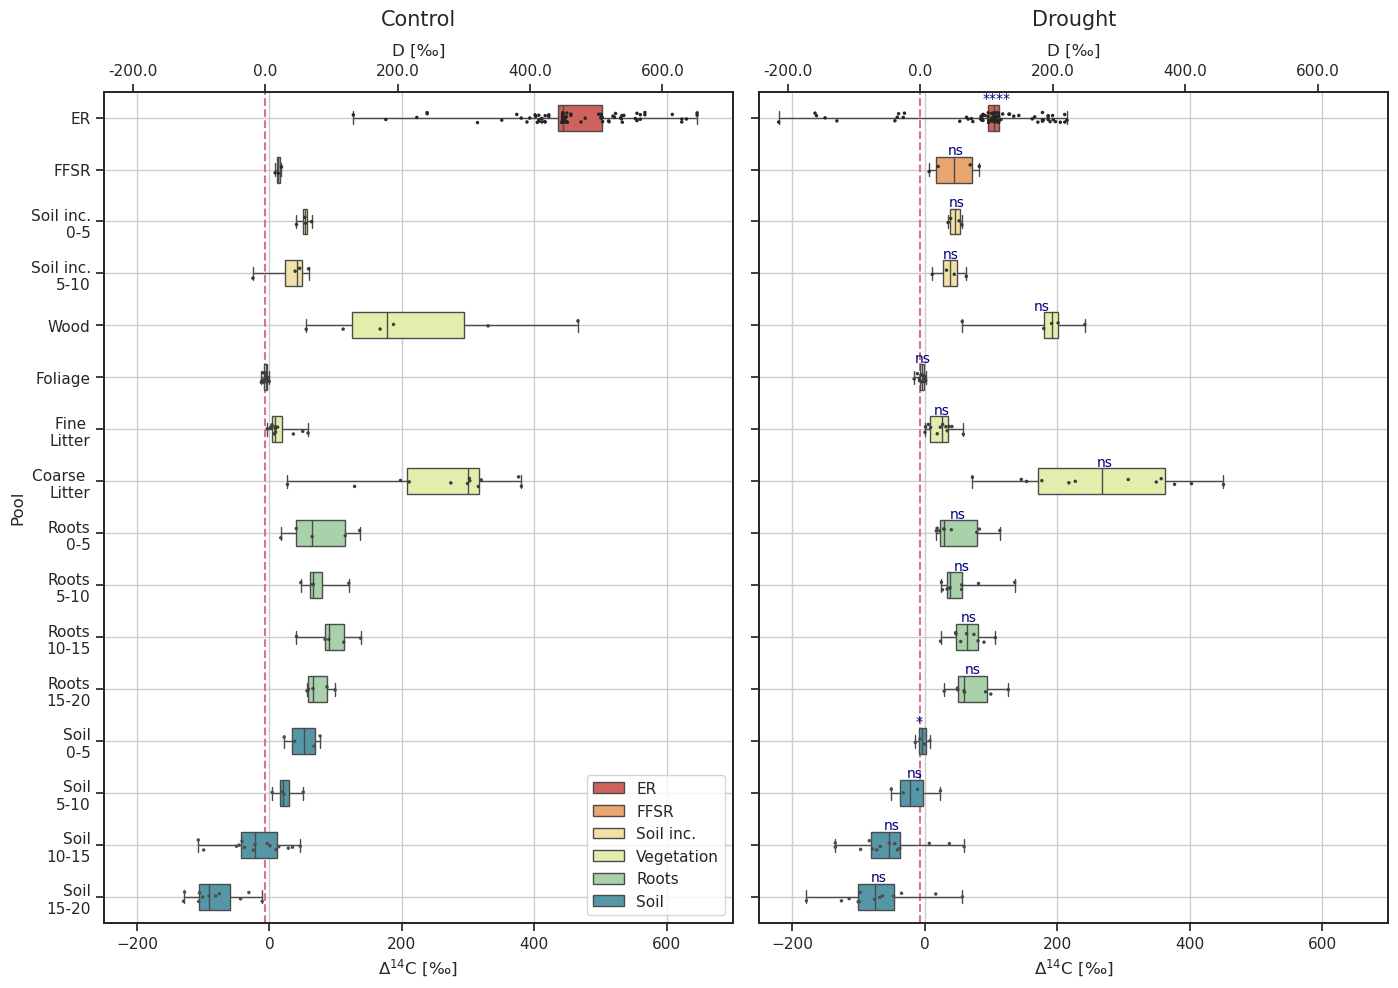

In [973]:
treat=['Control','Drought']
sns.set_theme(style="ticks")
fig,ax=plt.subplots(1,2,figsize=(10*np.sqrt(2),10))
ax[0].axvline(x=D14C_atm,color = 'palevioletred',linestyle='dashed')
ax[1].axvline(x=D14C_atm,color = 'palevioletred',linestyle='dashed')

cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,16))
for i in range(2):
    
    sns.boxplot(allD[allD['treatment']==treat[i]],x=allD.columns[1],y="pool2",hue='pool',
                whis=[0,100],ax=ax[i],width=.5,palette='Spectral')  
    sns.stripplot(allD[allD['treatment']==treat[i]],x=allD.columns[1],y="pool2",hue='pool',
                  size=2.5,palette='dark:.3',ax=ax[i])    
    ax[i].set_xlim(-250,700)
    # add p value              
    if i==1:
        medians=allD[allD['treatment']==treat[i]].groupby(['pool2'],sort=False)[allD.columns[1]].mean()
        pos=range(len(medians))
        for tick,label in zip(pos,ax[i].get_yticklabels()):
            ax[i].text(medians[tick]-10,tick-0.30,p_value(test[tick]),color='navy',size=10)      
    ax[i].set_xlabel('$\Delta^{14}$C [‰]')

    ax[i].yaxis.grid(True); ax[i].xaxis.grid(True)
    handles,labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[:6],labels[:6], loc='lower right')
    
    ax2=ax[i].twiny()
    ax2.set_xticks(ax[i].get_xticks()+D14C_atm)
    ax2.set_xbound(ax[i].get_xbound())
    ax2.set_xticklabels([x for x in ax[i].get_xticks()])
    ax2.set_title("D [‰]")
    plt.text(0.5, 1.08, treat[i],
         horizontalalignment='center',
         fontsize=15,
         transform = ax[i].transAxes)

ax[1].get_legend().set_visible(False)
ax[0].set_ylabel('Pool')
plt.setp(ax[1].get_yticklabels(),visible=False)

# #ax[0].spines[['right']].set_visible(False)
# #ax[1].spines[['left']].set_visible(False)
ax[1].set(ylabel=None)

plt.subplots_adjust(wspace=0.1)
plt.tight_layout()
fig.savefig('Figures/Data_field/14C_allpools_Prades.pdf')

In [939]:
D14C_atm

-6.526985996926027

In [940]:
400-D14C_atm

406.52698599692604